In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [2]:
mart_data = pd.read_csv("train.csv")

In [3]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#the number of datapoints and number of features
mart_data.shape

(8523, 12)

In [5]:
#getting some imformation
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Catagorical Features
#1 item_identifgier
#2 Item_Fat_Content
#3 Item_Type 
#4  Outlet_Identifier 
#5 Outlet_Size  
#6 Outlet_Location_Type
#7  Outlet_Type


In [7]:
#checking for missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#handling missing values
# mean - average value
# mode - most repeated value
# imputation method


In [9]:
#mean value of item_weight column
mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [10]:
#fitting the missing values in item weight column with mean value
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(),inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8712\3361033825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(),inplace=True)


In [11]:
#checking for missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#replacing the missing value in outlet_size colmuns with mode
# Calculate mode of Outlet_Size for each Outlet_Type
mode_of_outlet_size = mart_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)


In [13]:
print(mode_of_outlet_size)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [14]:
missing_values = mart_data['Outlet_Size'].isnull()

In [15]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
#taking all the null value(true) and replace it
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size)
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
#data analysis
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 800x600 with 0 Axes>

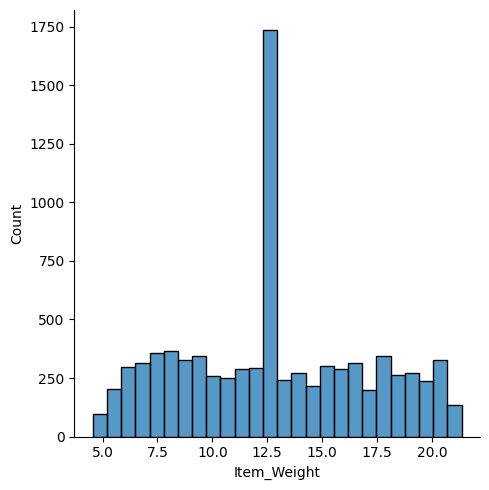

In [18]:
#Numerical Features
#Item_weight distribution
plt.figure(figsize=(8,6))
sns.displot(mart_data['Item_Weight'])

<Figure size 800x600 with 0 Axes>

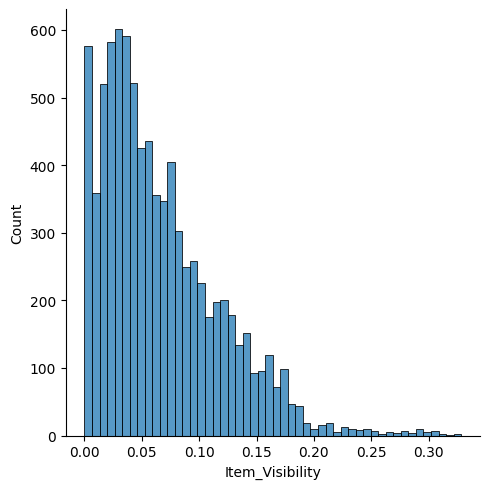

In [19]:
#Numerical Features
#item visibilaty distribution
plt.figure(figsize=(8,6))
sns.displot(mart_data['Item_Visibility'])

<Figure size 800x600 with 0 Axes>

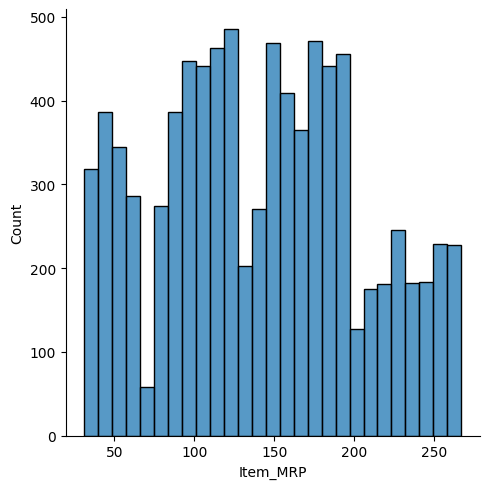

In [20]:
#Numerical Features
#Item_weight distribution
plt.figure(figsize=(8,6))
sns.displot(mart_data['Item_MRP'])

<Figure size 800x600 with 0 Axes>

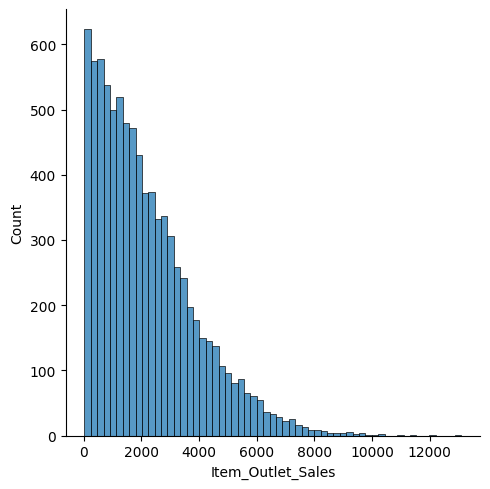

In [21]:
#Numerical Features
#Item_Outlet_Sales distribution
plt.figure(figsize=(8,6))
sns.displot(mart_data['Item_Outlet_Sales'])

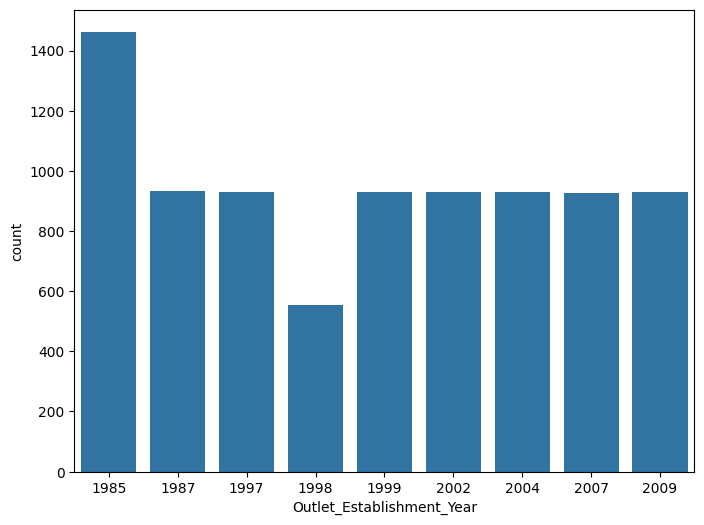

In [22]:
#Numerical Features
#Outlet Establishment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year',data=mart_data)
plt.show()

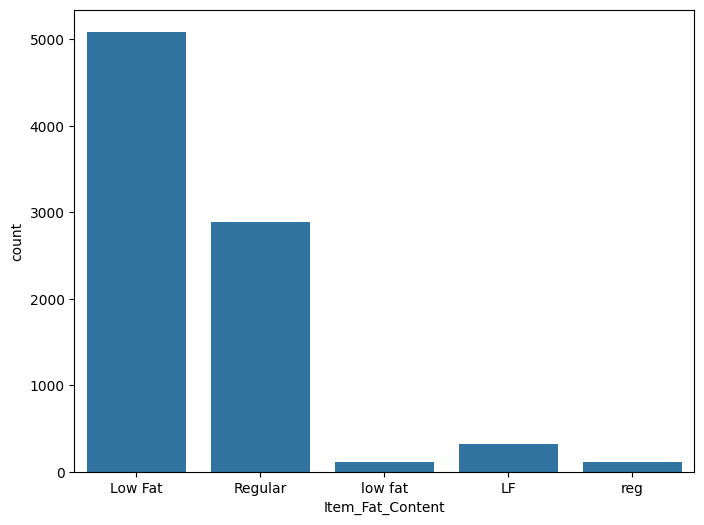

In [23]:
#Numerical Features
#item fat distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Fat_Content',data=mart_data)
plt.show()

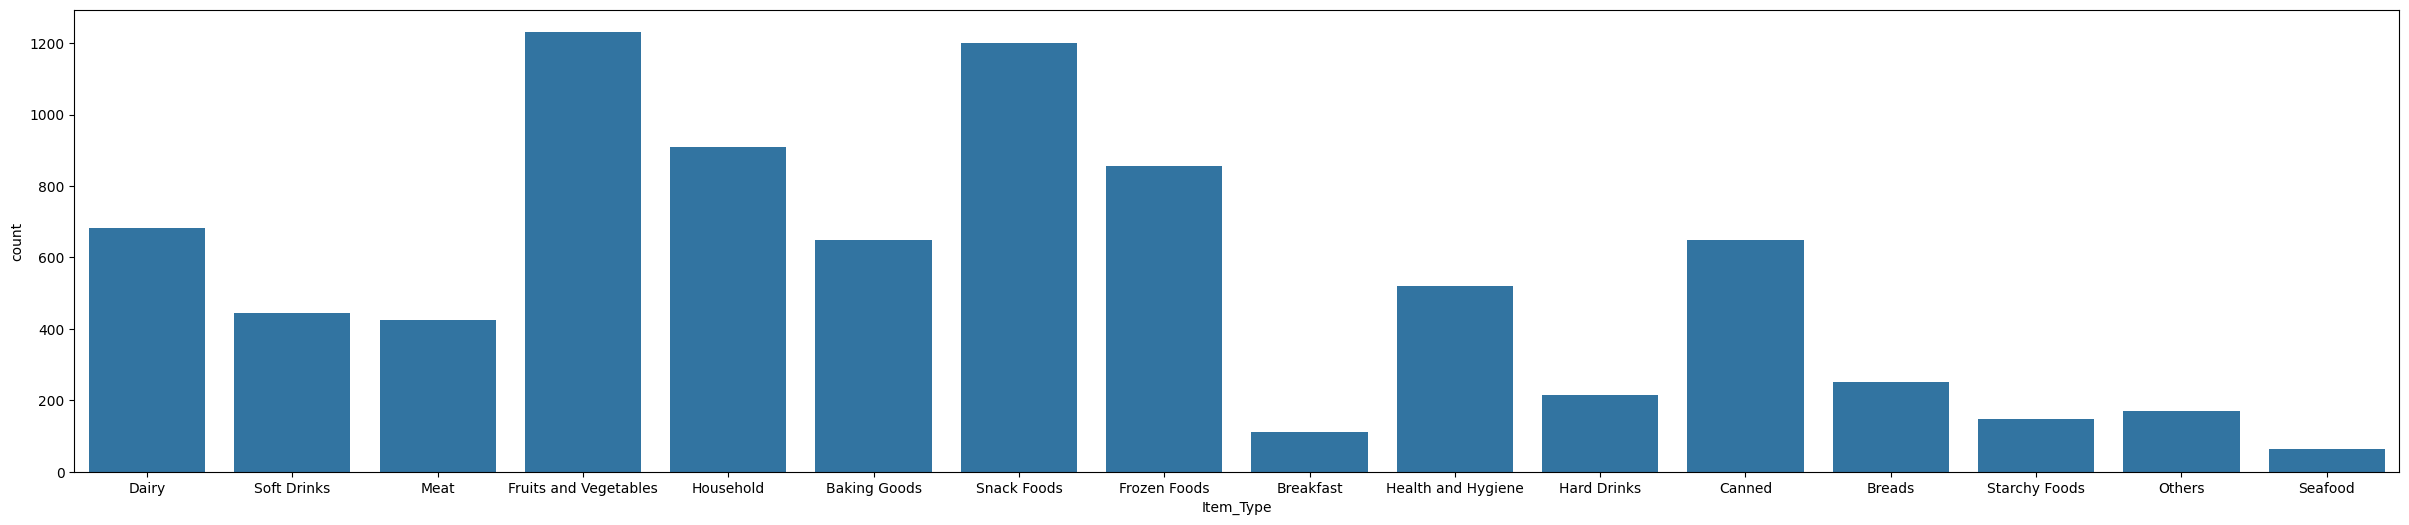

In [24]:
#in the fat distribution the low fat,lf are same as low fat, so the data is not clean. we should clean ot first
#Numerical Features
#item type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=mart_data)
plt.show()

In [25]:
#Data Preprocessing
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [28]:
mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [30]:
#Label Encoding
encoder = LabelEncoder()

In [31]:
#chaning the textual values to numerical values
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])
mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])
mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])
mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])
mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])
mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])
mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])


In [34]:
#splitting features and targets
x = mart_data.drop(columns='Item_Outlet_Sales',axis=1)
y = mart_data['Item_Outlet_Sales']

In [35]:
#Train and test data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
#model training
regressor = XGBRegressor()

In [37]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
#evaluation
training_data_prediction = regressor.predict(x_train)


In [39]:
#r2 value
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [40]:
print(r2_train) 

0.8742817384888855


In [41]:
#test data prediction

test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,test_data_prediction)
print(r2_test)

0.532559693340795
